# Insightface

Following [Unvelievable Face Swapping with 5 Line Code](https://www.youtube.com/watch?v=a8vFMaH2aDw) by Rob

In [12]:
import numpy as np 
import os 
import glob 
import cv2 
import matplotlib.pyplot as plt

import insightface 
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image
import sys 
sys.path.append('./files-connection/st_files_connection')
from st_files_connection import FilesConnection

In [2]:
print('insightface', insightface.__version__)
print('numpy', np.__version__)

insightface 0.7.3
numpy 1.25.0


In [18]:
# Loading test --work fine!!
import boto3
access_key_id = os.environ.get('AWS_ACCESS_KEY_ID')
secret_access_key = os.environ.get('AWS_SECRET_ACCESS_KEY')
default_region = os.environ.get('AWS_DEFAULT_REGION')

s3 = boto3.client('s3', 
                   aws_access_key_id=access_key_id, 
                   aws_secret_access_key=secret_access_key,
                   region_name=default_region)
s3.download_file('my-faceswapping-bucket', 'inswapper_128.onnx', 'inswapper_128.onnx')
swapper = insightface.model_zoo.get_model('inswapper_128.onnx', download=False, download_zip=False)



/home/satoshi/projects/face-swapping/venv/lib/python3.10/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:65: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


# Step 1. Detect Faces

In [13]:
app = FaceAnalysis(name="buffalo_l")
app.prepare(ctx_id=0, det_size=(640,640))

download_path: /home/satoshi/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:07<00:00, 36201.44KB/s]
/home/satoshi/projects/face-swapping/venv/lib/python3.10/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:65: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/satoshi/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/satoshi/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/satoshi/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/satoshi/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/satoshi/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127

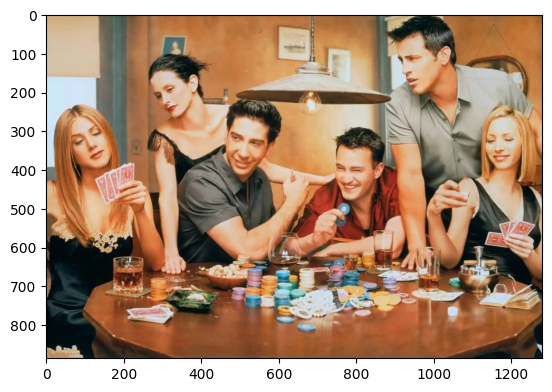

In [6]:
img = ins_get_image('t1')
plt.imshow(img[:,:,::-1])
plt.show()


In [14]:
faces = app.get(img)

NameError: name 'img' is not defined

In [ ]:
faces[0].bbox

array([466.0821 , 268.6164 , 573.58923, 415.5331 ], dtype=float32)

# Crop and plot Faces

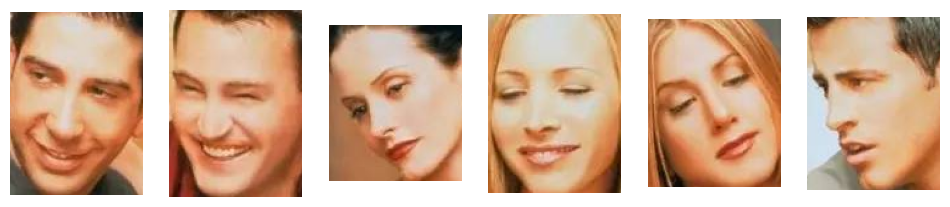

In [18]:
img = ins_get_image('t1')
fig, axs =plt.subplots(1,6, figsize=(12,5))

# fill faces in the plots 
for i, face in enumerate(faces):
    bbox= face['bbox']
    bbox = [int(b) for b in bbox]
    axs[i].imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
    axs[i].axis('off')

# Step 2. Face Swapping
You can download trained modle [here](https://www.reddit.com/r/midjourney/comments/13pnraj/please_reupload_inswapper_128onnx/)


In [19]:
swapper = insightface.model_zoo.get_model('inswapper_128.onnx',download=False,download_zip=False)


/home/satoshi/projects/face-swapping/venv/lib/python3.10/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:65: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


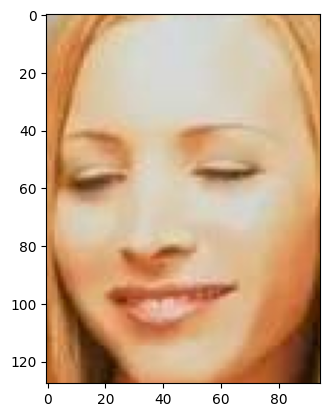

In [23]:
source_face= faces[3]
bbox = source_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
plt.show()

In [24]:
res = img.copy()
for face in faces:
    res = swapper.get(res, face, source_face,paste_back=True)

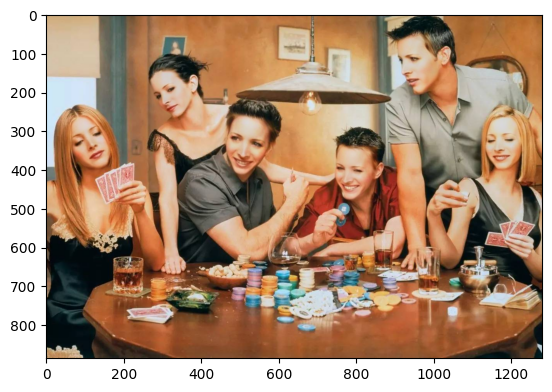

In [25]:
plt.imshow(res[:,:,::-1])
plt.show()